## Homework:

1.Given the iris data set, use the last two features "penal length" and "penal width" to predict the "species". Build a logistic regression and:

- (1) Print out the accuracy
- (2) Make a prediction given a new observation $\text{penal length} = 7$, $\text{penal width}=4$, as well as the probabilities $p(y=i|x)$.
- (3) Plot out the linear boundaries, and compare it with the LDA's boundary.



In [128]:
%pylab inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import linear_model
from sklearn import datasets
from sklearn import lda
from sklearn import svm
from sklearn import naive_bayes
from sklearn import neighbors

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


----------------------------------------------------------------------
Part 1 - Accuracy
Accuracy of the model: 0.8733
----------------------------------------------------------------------
Part 2 - Prediction
Using petal length = 7 and petal width = 4, the model predicts the following species: virginica
Here are the probabilities for a PL7 and PW4 in each species:
	setosa: 0.0000
	versicolor: 0.1103
	virginica: 0.8897
The highest probability belongs to virginica, with a probability of 0.8897
----------------------------------------------------------------------
Part 3 - Visualization


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local

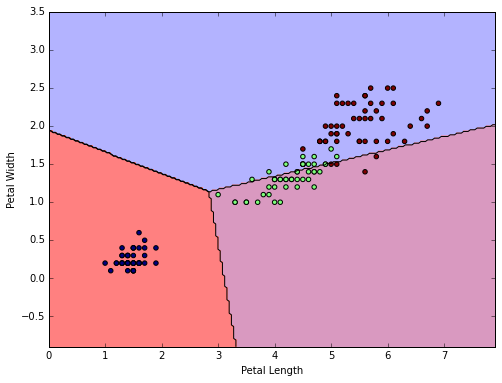

In [129]:
iris = datasets.load_iris()   

x = iris.data[:, 2:]
y = iris.target

logit = linear_model.LogisticRegression()
logit.fit(x, y)

print "-" * 70
print "Part 1 - Accuracy"
print "Accuracy of the model: %.4f" %logit.score(x,y)

print "-" * 70
print "Part 2 - Prediction"
print "Using petal length = 7 and petal width = 4, the model predicts the following species: %s" %iris.target_names[logit.predict([7, 4])][0]
print "Here are the probabilities for a PL7 and PW4 in each species:"
for i in np.arange(len(iris.target_names)):
    print "\t%s: %.4f" %(iris.target_names[i], logit.predict_proba([7, 4])[0][i])
print "The highest probability belongs to virginica, with a probability of %.4f" %logit.predict_proba([7, 4])[0][2]

print "-" * 70
print "Part 3 - Visualization"



def plotModel(model, x, y, label):
    '''Sourced from Lecture Notes
    model: a fitted model
    x, y: two variables, should arrays
    label: true label
    '''
    plt.rcParams['figure.figsize'] = 8, 6
    
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1

    colDict = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
               'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
               'blue': [(0, 1, 0.5), (1, 1, 1)]}
    
    cmap = colors.LinearSegmentedColormap('red_blue_classes', colDict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters ans true labels
    plt.scatter(x, y, c = label)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    

plotModel(logit, x[:, 0], x[:, 1], y)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

----------------------------------------------------------------------
Part 4 - LDA
Accuracy of the LDA model: 0.9600


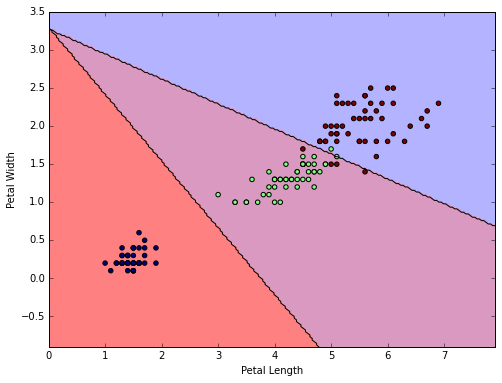

In [130]:
print "-" * 70
print "Part 4 - LDA"

lda = lda.LDA()
lda.fit(x, y)
print "Accuracy of the LDA model: %.4f" %lda.score(x,y)

plotModel(lda, x[:, 0], x[:, 1], y)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

In [131]:
print "The accuracy of the LDA (.96) is higher than that of the logistic regression (.873).  Given the boundaries displayed, the LDA does a better job of classifying the second and third groups than the logistic regression."

The accuracy of the LDA (.96) is higher than that of the logistic regression (.873).  Given the boundaries displayed, the LDA does a better job of classifying the second and third groups than the logistic regression.


2.There are three files in the "data" folder:

    - "spam_train.csv"
    - "spam_test.csv"
    - "spam.txt"

The file "spam_train.csv" in the "data" folder contains 2300 emails and 58 variables. The last variable "spam" is a factor with two levels: "email", "spam". If you want to know more information about the data set, please read the file "spam.txt".

Your assignment is based on the "spam_train.csv" file, try to build a classifier to predict the variable "spam". You need to write a report which contains:

- (1) The features you are using to build the model.
- (2) At least two models we have learned.
- (3) After building the models, report the corresponding accuracy on the training set.
- (4) Use you models to make prediction on the "spam_test.csv" file, report the corresponding accuracy on this test set.
- (5) Compare the performance of the models in the following two aspect:
    - (a) the performance of two different models.
    - (b) the performance of one model on the training set and test set.

In [165]:
from sklearn import lda
from sklearn import svm
train = pd.read_csv('spam_train.csv')
test = pd.read_csv('spam_test.csv')

train_x = train.iloc[:, :57]
train_y = train.iloc[:, 57]

test_x = test.iloc[:, :57]
test_y = test.iloc[:, 57]

logit = linear_model.LogisticRegression()
lda = lda.LDA()
knn = neighbors.KNeighborsClassifier(n_neighbors=np.sqrt(len(train)))
svm = svm.SVC()
nb = naive_bayes.GaussianNB()

myModels = [[logit, lda, knn, svm, nb],
            ["Logit","LDA","KNN","SVM","NB"]]

for i in arange(len(myModels[0])):
    print "-" * 70
    print "Fitting Model: %s" %myModels[1][i]
    myModels[0][i].fit(train_x, train_y)
    print "Training Accuracy: %.4f" %myModels[0][i].score(train_x, train_y)
    print "Testing Accuracy: %.4f" %myModels[0][i].score(test_x, test_y)
        
print "-" * 70
print "Summary:"
print """The SVM model produces the hightest training accuracy (.9422), however, the testing accuracy of .8044 suggests that the SVM model is over fitting the data.
I would choose to use the logistic regression model, given a high training accuracy (.9313) and a relatively high test accuracy (.9244)"""


/usr/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:72: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return [func(*args, **kwargs) for func, args, kwargs in self.items]
/usr/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:72: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return [func(*args, **kwargs) for func, args, kwargs in self.items]
/usr/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:72: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return [func(*args, **kwargs) for func, args, kwargs in self.items]


----------------------------------------------------------------------
Fitting Model: Logit
Training Accuracy: 0.9313
Testing Accuracy: 0.9244
----------------------------------------------------------------------
Fitting Model: LDA
Training Accuracy: 0.8917
Testing Accuracy: 0.8970
----------------------------------------------------------------------
Fitting Model: KNN
Training Accuracy: 0.7443

/usr/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:72: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return [func(*args, **kwargs) for func, args, kwargs in self.items]
/usr/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:72: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return [func(*args, **kwargs) for func, args, kwargs in self.items]
/usr/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:72: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return [func(*args, **kwargs) for func, args, kwargs in self.items]
/usr/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:72: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return [func(*args, **kwargs) for func, 


Testing Accuracy: 0.7349
----------------------------------------------------------------------
Fitting Model: SVM
Training Accuracy: 0.9422
Testing Accuracy: 0.8044
----------------------------------------------------------------------
Fitting Model: NB
Training Accuracy: 0.8309
Testing Accuracy: 0.8170
----------------------------------------------------------------------
Summary:
The SVM model produces the hightest training accuracy (.9422), however, the testing accuracy of .8044 suggests that the SVM model is over fitting the data.
I would choose to use the logistic regression model, given a high training accuracy (.9313) and a relatively high test accuracy (.9244)


/usr/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:72: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return [func(*args, **kwargs) for func, args, kwargs in self.items]
